In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

Using TensorFlow backend.


# Data Distribution

In [3]:
print('train data shape ; ', train_data.shape)
print('test data shape ; ', test_data.shape)

train data shape ;  (404, 13)
test data shape ;  (102, 13)


In [4]:
print('train target shape ; ', train_target.shape)
print('test target shape ; ', test_target.shape)

train target shape ;  (404,)
test target shape ;  (102,)


## target 

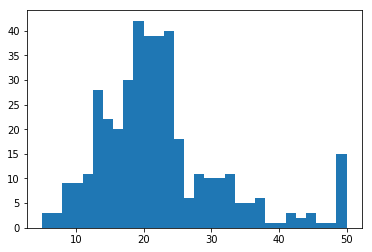

In [7]:
import matplotlib.pyplot as plt
plt.hist(train_target, bins = 30)
plt.show()

## features
피쳐들의 scale이 매우 제각각임을 알 수 있다

In [6]:
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


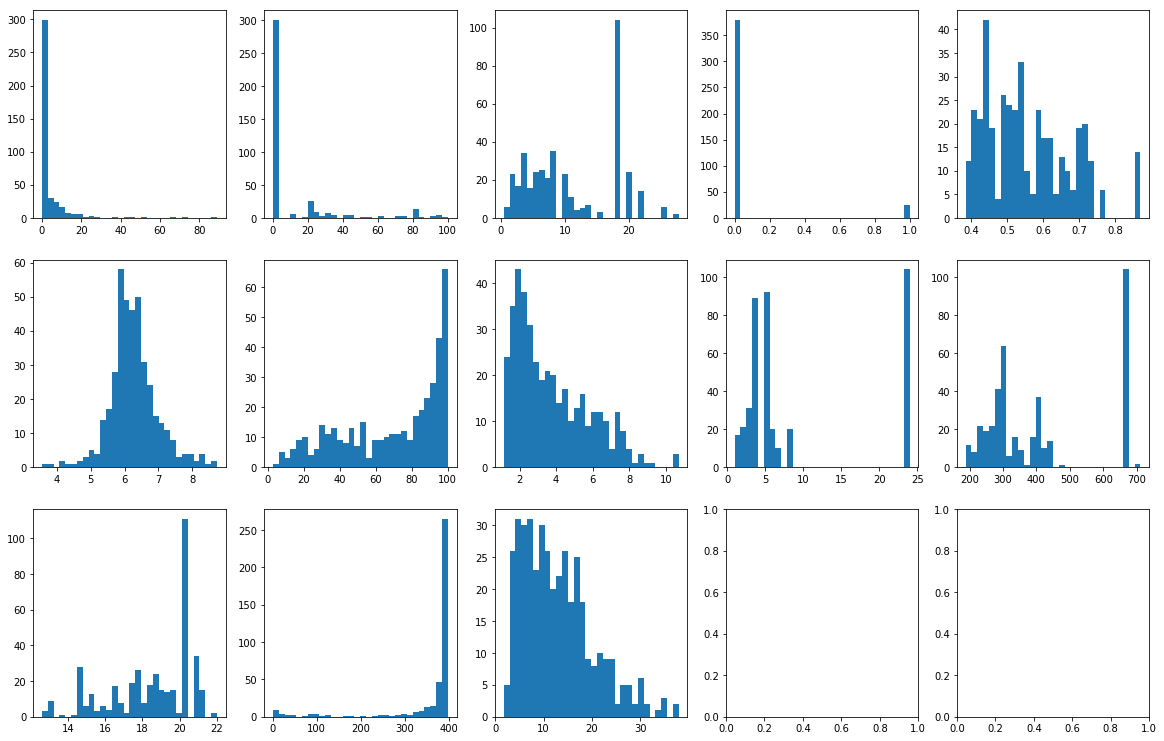

In [23]:
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20,13))
for i in range(train_data.shape[1]) :
    plt.subplot(3,5,i+1)
    plt.hist(train_data[:,i], bins=30)        

# prepare dataset

In [8]:
#standardscale

mean = train_data.mean(axis = 0 )
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std


#절대로 테스트 데이터에서 계산한 어떤 값도 사용하면 안 된다!!!!!!!!
test_data -=mean
test_data /= std

In [9]:
from keras import models
from keras import layers

In [19]:
def build_model() :
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1)) #no activation fucntion|
    
    return model

# k-fold

In [11]:
import numpy as np

## epochs = 100
### only cpu

In [26]:
%%time
k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k) :
    print('###',i,'###')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_target[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples],
                                          train_target[(i+1) * num_val_samples:]], axis = 0)
    
    
    model = build_model()
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

    model.fit(partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 1)
    all_scores.append(val_mae)
        

### 0 ###
101/101 [==============================] - 0s 662us/step
### 1 ###
101/101 [==============================] - 0s 714us/step
### 2 ###
101/101 [==============================] - 0s 788us/step
### 3 ###
101/101 [==============================] - 0s 803us/step
CPU times: user 3min 42s, sys: 16.7 s, total: 3min 59s
Wall time: 1min 58s


### using one GPU

In [28]:
import keras.backend.tensorflow_backend as K
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2063208971530577563
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10923252122
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 10967218871509264449
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10925244416
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 11086042473044993407
physical_device_desc: "device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [29]:
import keras.backend.tensorflow_backend as K    

In [35]:
%%time
all_scores = []

for i in range(k) :
    print('###',i,'###')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_target[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples],
                                          train_target[(i+1) * num_val_samples:]], axis = 0)
    
    with K.tf.device('/gpu:0') :
        model = build_model()
        model = multi_gpu_model(model, gpus=2) #using multi gpus
        model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae']) #after multi_gpu_model compile!!

        model.fit(partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 1)
    all_scores.append(val_mae)

### 0 ###
101/101 [==============================] - 0s 2ms/step
### 1 ###
101/101 [==============================] - 0s 2ms/step
### 2 ###
101/101 [==============================] - 0s 2ms/step
### 3 ###
101/101 [==============================] - 0s 2ms/step
CPU times: user 8min 18s, sys: 48.8 s, total: 9min 7s
Wall time: 2min 57s


### using multi GPU

In [31]:
from keras.utils.training_utils import multi_gpu_model

In [36]:
%%time
all_scores = []

for i in range(k) :
    print('###',i,'###')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_target[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples],
                                          train_target[(i+1) * num_val_samples:]], axis = 0)
    
    
    model = build_model()
    model = multi_gpu_model(model, gpus=2) #using multi gpus
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae']) #after multi_gpu_model compile!!

    model.fit(partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 1)
    all_scores.append(val_mae)
        

### 0 ###
101/101 [==============================] - 0s 2ms/step
### 1 ###
101/101 [==============================] - 0s 2ms/step
### 2 ###
101/101 [==============================] - 0s 2ms/step
### 3 ###
101/101 [==============================] - 0s 2ms/step
CPU times: user 8min 22s, sys: 49.4 s, total: 9min 12s
Wall time: 3min


In [37]:
!nvidia-smi

Wed May  1 20:37:04 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0 Off |                  N/A |
| 28%   50C    P2    58W / 250W |  10661MiB / 11176MiB |      7%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:02:00.0 Off |                  N/A |
| 28%   50C    P2    56W / 250W |  10663MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

GPU를 사용하는 것이 항상 빠른 것은 아니다!

## epochs = 500

In [39]:
num_epochs = 500
all_mae_history = []

for i in range(k) :
    print('###',i,'###')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_target[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples],
                                          train_target[(i+1) * num_val_samples:]], axis = 0)
    
    
    model = build_model()
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

    history = model.fit(partial_train_data, partial_train_target, 
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_history.append(mae_history)
        

### 0 ###
### 1 ###
### 2 ###
### 3 ###


In [63]:
#4-fold / epochs : 500
print(np.array(all_mae_history).shape)
average_mae_history = np.mean(all_mae_history, axis = 0)

(4, 500)


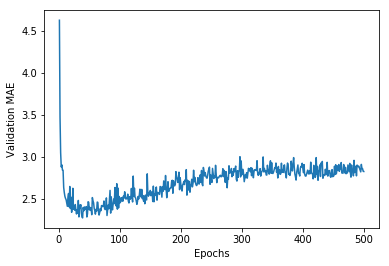

In [64]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 변동이 심해서 첫 10개의 데이터는 제거
- 지수 이동 평균(exponential moving average)으로 대체 대체 : 최근 데이터에 가중치를 줌

In [67]:
def smooth_curve(points, factor = 0.9) :
    smoothed_points = []
    
    for point in points :
        if smoothed_points :
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else :
            smoothed_points.append(point)
            
    return smoothed_points

In [68]:
#first 10 obs 버린다
smooth_mae_history = smooth_curve(average_mae_history[10:])

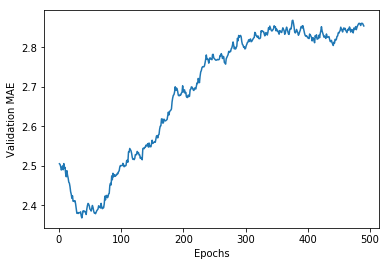

In [69]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

80번째 epoch 이후로 줄어두는 것이 멈춤

In [70]:
model = build_model()
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.fit(train_data, train_target, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

102/102 [==============================] - 0s 2ms/step


In [71]:
test_mae_score

2.6104196380166447